# **Download the data from Kaggle**

In [0]:
!pip install kaggle

In [0]:
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import Dense, Input, GlobalMaxPooling1D

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lucky66","key":"5c4020ffe7511554e75879d1dd933e15"}'}

In [0]:
ls

kaggle.json  sample_data/


In [0]:
!mkdir /root/.kaggle/

In [0]:
!mv kaggle.json ~/.kaggle/

In [0]:
!ls ~/.kaggle

kaggle.json


In [0]:
!kaggle competitions download -c job-salary-prediction

  0% 0.00/1.60M [00:00<?, ?B/s]
100% 1.60M/1.60M [00:00<00:00, 52.4MB/s]
  0% 0.00/1.12M [00:00<?, ?B/s]
100% 1.12M/1.12M [00:00<00:00, 76.5MB/s]
 99% 121M/122M [00:03<00:00, 27.5MB/s]
100% 122M/122M [00:03<00:00, 35.4MB/s]
 43% 5.00M/11.7M [00:00<00:00, 17.7MB/s]
100% 11.7M/11.7M [00:00<00:00, 29.5MB/s]
 92% 63.0M/68.4M [00:00<00:00, 52.0MB/s]
100% 68.4M/68.4M [00:01<00:00, 61.4MB/s]
 94% 62.0M/65.8M [00:01<00:00, 33.2MB/s]
100% 65.8M/65.8M [00:01<00:00, 51.6MB/s]
  0% 0.00/1.17M [00:00<?, ?B/s]
100% 1.17M/1.17M [00:00<00:00, 77.9MB/s]
 80% 49.0M/61.4M [00:01<00:00, 30.6MB/s]
100% 61.4M/61.4M [00:01<00:00, 57.6MB/s]
 72% 24.0M/33.2M [00:00<00:00, 20.3MB/s]
100% 33.2M/33.2M [00:00<00:00, 42.6MB/s]
  0% 0.00/3.37M [00:00<?, ?B/s]
100% 3.37M/3.37M [00:00<00:00, 111MB/s]


In [0]:
ls

Location_Tree.csv                      test.csv       Train_rev1.zip
mean_benchmark.csv                     Test_rev1.7z   Valid_rev1.7z
random_forest_benchmark_test_rev1.csv  Test_rev1.zip  Valid_rev1.csv
sample_data/                           Train_rev1.7z


In [0]:
#Make a new directory "jobsalary"
!mkdir jobsalary

In [0]:
#unzip the data files (train & test) & copy the validation file
!unzip Train_rev1.zip -d ./jobsalary/
!unzip Test_rev1.zip -d ./jobsalary/
!cp Valid_rev1.csv ./jobsalary/

Archive:  Train_rev1.zip
  inflating: ./jobsalary/Train_rev1.csv  
Archive:  Test_rev1.zip
  inflating: ./jobsalary/Test_rev1.csv  


In [0]:
#Check the contents in the folder
ls ./jobsalary

Test_rev1.csv  Train_rev1.csv  Valid_rev1.csv


In [0]:
#Check the first 10 rows of train data
!head ./jobsalary/Train_rev1.csv

Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
12612628,Engineering Systems Analyst,"Engineering Systems Analyst Dorking Surrey Salary ****K Our client is located in Dorking, Surrey and are looking for Engineering Systems Analyst our client provides specialist software development Keywords Mathematical Modelling, Risk Analysis, System Modelling, Optimisation, MISER, PIONEEER Engineering Systems Analyst Dorking Surrey Salary ****K","Dorking, Surrey, Surrey",Dorking,,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
12612830,Stress Engineer Glasgow,"Stress Engineer Glasgow Salary **** to **** We re currently looking for talented engineers to join our growing Glasgow team at a variety of levels. The roles are ideally suited to high calibre engineering graduates with any level of appropriate experience, so that we can give you the opportunity to 

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [0]:
train_df = pd.read_csv('./jobsalary/Train_rev1.csv', header=0)

In [0]:
#Check the first 5 rows of train data
train_df.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [0]:
#train_df["FullDescription"][0]

In [0]:
#train_df["FullDescription"][3]

'Engineering Systems Analyst / Mathematical Modeller. Our client is a highly successful and respected Consultancy providing specialist software development MISER, PIONEER, Maths, Mathematical, Optimisation, Risk Analysis, Asset Management, Water Industry, Access, Excel, VBA, SQL, Systems . Engineering Systems Analyst / Mathematical Modeller. Salary  ****K****K negotiable Location Dorking, Surrey'

In [0]:
#train_df["FullDescription"][4]

'Pioneer, Miser  Engineering Systems Analyst Dorking  Surrey Salary ****K Located in Surrey, our client provides specialist software development Pioneer, Miser  Engineering Systems Analyst Dorking  Surrey Salary ****K'

In [0]:
#train_df["SalaryNormalized"][0]

25000

# **Preprocess the data**
------

In [0]:
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
#Consider "FullDescription" column of the data to predict the salary for the job
words_to_stem=train_df["FullDescription"]

In [0]:
type (words_to_stem)

pandas.core.series.Series

In [0]:
words_to_stem.values

array(['Engineering Systems Analyst Dorking Surrey Salary ****K Our client is located in Dorking, Surrey and are looking for Engineering Systems Analyst our client provides specialist software development Keywords Mathematical Modelling, Risk Analysis, System Modelling, Optimisation, MISER, PIONEEER Engineering Systems Analyst Dorking Surrey Salary ****K',
       'Stress Engineer Glasgow Salary **** to **** We re currently looking for talented engineers to join our growing Glasgow team at a variety of levels. The roles are ideally suited to high calibre engineering graduates with any level of appropriate experience, so that we can give you the opportunity to use your technical skills to provide high quality input to our aerospace projects, spanning both aerostructures and aeroengines. In return, you can expect good career opportunities and the chance for advancement and personal and professional development, support while you gain Chartership and some opportunities to possibly travel o

In [0]:
#Tokenize the "words_to_stem" using Word tokenizer
tokenized = [word_tokenize(w) for w in words_to_stem.values]

In [0]:
tokenized[0]

['Engineering',
 'Systems',
 'Analyst',
 'Dorking',
 'Surrey',
 'Salary',
 '****K',
 'Our',
 'client',
 'is',
 'located',
 'in',
 'Dorking',
 ',',
 'Surrey',
 'and',
 'are',
 'looking',
 'for',
 'Engineering',
 'Systems',
 'Analyst',
 'our',
 'client',
 'provides',
 'specialist',
 'software',
 'development',
 'Keywords',
 'Mathematical',
 'Modelling',
 ',',
 'Risk',
 'Analysis',
 ',',
 'System',
 'Modelling',
 ',',
 'Optimisation',
 ',',
 'MISER',
 ',',
 'PIONEEER',
 'Engineering',
 'Systems',
 'Analyst',
 'Dorking',
 'Surrey',
 'Salary',
 '****K']

In [0]:
type(tokenized)

list

In [0]:
type(tokenized[0])

list

In [0]:
type(tokenized[0][0])

str

In [0]:
ps=PorterStemmer()

In [0]:
for i in range(len(tokenized)):
  for j in range(len(tokenized[i])):
    tokenized[i][j] = ps.stem(tokenized[i][j])

In [0]:
#Convert from "list of list of strings" to "list of strings"
tokenized=[' '.join(x) for x in tokenized]

In [0]:
print(tokenized[0])

engin system analyst dork surrey salari ****k our client is locat in dork , surrey and are look for engin system analyst our client provid specialist softwar develop keyword mathemat model , risk analysi , system model , optimis , miser , pioneeer engin system analyst dork surrey salari ****k


In [0]:
#Keras "Tokenizer"
tokenizer = Tokenizer(num_words=50000, lower=True)

In [0]:
#tokenizer.fit_on_texts(train_df["FullDescription"])
tokenizer.fit_on_texts(tokenized)

In [0]:
#Vectorize the text samples into a 2D integer tensor
#replaces each word with particular numbers
sequences = tokenizer.texts_to_sequences(tokenized)

In [0]:
#len(sequences)

In [0]:
#for x in range(5):
#  print (sequences[x])

In [0]:
type (sequences)

list

In [0]:
sequences[0]

[56,
 77,
 350,
 5456,
 962,
 91,
 140,
 34,
 27,
 12,
 204,
 6,
 5456,
 962,
 1,
 19,
 51,
 7,
 56,
 77,
 350,
 34,
 27,
 45,
 230,
 139,
 22,
 1216,
 1534,
 527,
 328,
 297,
 77,
 527,
 1105,
 24577,
 56,
 77,
 350,
 5456,
 962,
 91,
 140]

In [0]:
sequences[0][0]

56

In [0]:
#Keep max length of each sentence to be 1000. Sentences with less than 1000 words are padded with zeroes & sentences with more than 1000 words are cut off after 1000 words.
from keras.preprocessing.sequence import pad_sequences
sequences = pad_sequences(sequences, maxlen=1000)

In [0]:
#Split data into Train & Test data
X_train, X_test, y_train, y_test = train_test_split(sequences, train_df["SalaryNormalized"], test_size=0.2, random_state=42)

In [0]:
# Load word embeddings into an Embedding layer
# Note that we set trainable = True so as to keep the embeddings not fixed
embedding_layer = Embedding(50000, 128, input_length=1000, trainable=True)#the model will take as input an integer matrix of size (batch, input_length)
# The largest integer (i.e. word index) in the input should be no larger than 49999 (vocabulary size)
# Now model.output_shape == (None, 1000, 128), where None is the batch dimension

W0819 19:54:07.964297 139937565521792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



# **Modelling**

In [0]:
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dropout
# train a 1D convnet with global maxpooling
sequence_input = Input(shape=(1000,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(256, 4, activation='relu')(embedded_sequences)#number of channels, kernel size
x1 = MaxPooling1D(3)(x)
x2 = Conv1D(128, 5, activation='relu')(x1)
x3 = MaxPooling1D(3)(x2)
#x = Conv1D(32, 5, activation='relu')(x3)
#x = GlobalMaxPooling1D()(x)
x4 = Flatten(data_format=None)(x)
x5 = Dropout(0.5)(x3)
x6 = Dense(128, activation='relu')(x4)
preds = Dense(1)(x6)

model = Model(sequence_input, preds)
#model.compile(optimizer='rmsprop', loss='mean_absolute_error')
model.compile(optimizer='rmsprop', loss='mean_absolute_error')

history = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_test, y_test))

Train on 195814 samples, validate on 48954 samples
Epoch 1/5
195814/195814 [==============================] - 207s 1ms/step - loss: 8338.2540 - val_loss: 7620.9630
Epoch 2/5
195814/195814 [==============================] - 205s 1ms/step - loss: 7200.8771 - val_loss: 7348.2409
Epoch 3/5
195814/195814 [==============================] - 205s 1ms/step - loss: 6892.1073 - val_loss: 7123.7050
Epoch 4/5
195814/195814 [==============================] - 204s 1ms/step - loss: 6572.6364 - val_loss: 6954.0461
Epoch 5/5
195814/195814 [==============================] - 203s 1ms/step - loss: 6298.3064 - val_loss: 6902.4470


# Visualization

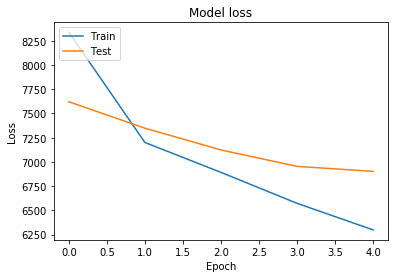

In [0]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()